<a href="https://colab.research.google.com/github/mariacb24/Data-Mining/blob/main/UAS_Data_Mining_19340017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Data**

Rekomendasi produk berdasarkan pola pembelian pada bagian hari tertentu

In [2]:
import pandas as pd
file_path = 'Bakery.csv'
data = pd.read_csv(file_path)

data

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend


# **Data Cleaning**

1. Menghapus baris duplikat untuk memastikan setiap transaksi unik.

In [3]:
data = data.drop_duplicates()
print("Data setelah drop data duplikat:", data.shape)

Data setelah drop data duplikat: (18887, 5)


2. Mengonversi kolom DateTime menjadi format datetime untuk analisis waktu.

In [4]:
data['DateTime'] = pd.to_datetime(data['DateTime'])

<ipython-input-4-6882f9ad1de6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DateTime'] = pd.to_datetime(data['DateTime'])


3. Memeriksa apakah ada nilai kosong

In [8]:
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 TransactionNo            0
Items                    0
DateTime                 0
Daypart                  0
DayType                  0
                        ..
Item_Tshirt              0
Item_Valentine's card    0
Item_Vegan Feast         0
Item_Vegan mincepie      0
Item_Victorian Sponge    0
Length: 101, dtype: int64


In [6]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_enc = LabelEncoder()
data['Daypart_encoded'] = label_enc.fit_transform(data['Daypart'])
data['DayType_encoded'] = label_enc.fit_transform(data['DayType'])

items_encoded = pd.get_dummies(data['Items'], prefix='Item')
data = pd.concat([data, items_encoded], axis=1)

data

<ipython-input-6-0a9ba549a8e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Daypart_encoded'] = label_enc.fit_transform(data['Daypart'])
<ipython-input-6-0a9ba549a8e8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DayType_encoded'] = label_enc.fit_transform(data['DayType'])


,TransactionNo,Items,DateTime,Daypart,DayType,Daypart_encoded,DayType_encoded,Item_Adjustment,Item_Afternoon with the baker,Item_Alfajores,...,Item_The BART,Item_The Nomad,Item_Tiffin,Item_Toast,Item_Truffles,Item_Tshirt,Item_Valentine's card,Item_Vegan Feast,Item_Vegan mincepie,Item_Victorian Sponge
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,3,Cookies,2016-10-30 10:07:57,Morning,Weekend,2,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend,0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend,0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend,0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend,0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Encoding Categorical Data

1. Daypart dan DayType dikonversi menjadi nilai numerik untuk digunakan dalam algoritma

2. Items diubah menjadi beberapa kolom biner (0/1) untuk setiap item, memungkinkan analisis pola pembelian.

# **EDA**

1. Menganalisis waktu transaksi (dalam jam) untuk melihat pola waktu yang sibuk.

<Axes: >

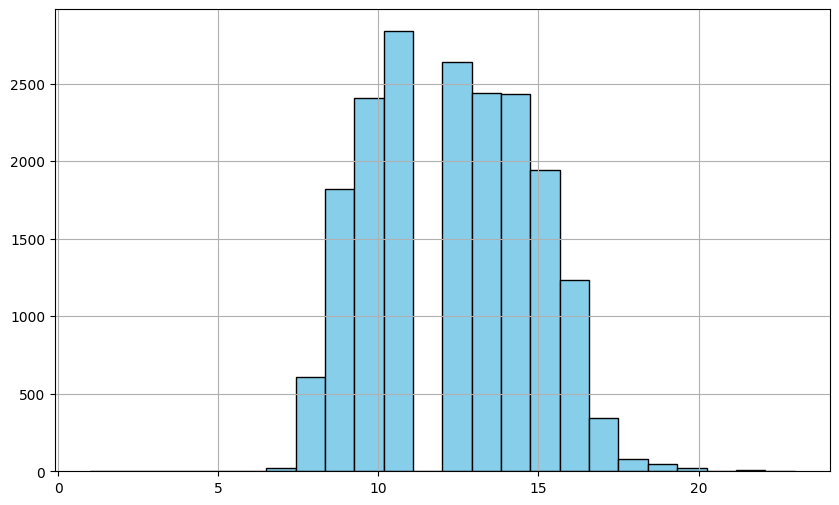

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data['DateTime'].dt.hour.hist(bins=24, color='skyblue', edgecolor='black')

Dari histogram distribusi waktu transaksi dalam jam (menggunakan data DateTime), terlihat pola transaksi harian sebagai berikut:

Pola Distribusi:

Sebagian besar transaksi terjadi antara pukul 10:00 hingga 15:00.
Puncak aktivitas transaksi berada sekitar pukul 12:00 hingga 13:00, yang mungkin mencerminkan waktu makan siang, ketika pelanggan lebih sering membeli produk bakery.
Penurunan Aktivitas:

Aktivitas mulai menurun setelah pukul 15:00, dengan sedikit transaksi yang terjadi pada malam hari setelah pukul 20:00.
Aktivitas hampir nol di waktu dini hari (sebelum pukul 6:00), yang sesuai dengan jam operasional bisnis bakery pada umumnya.
Rekomendasi:

Optimalisasi Stok: Produk yang sering habis dapat diisi ulang sebelum waktu sibuk (10:00-12:00) untuk menghindari kehabisan.
Promosi Tertarget: Menawarkan promosi di jam sibuk untuk meningkatkan transaksi lebih lanjut atau di jam sepi (sebelum pukul 10:00 atau setelah pukul 15:00) untuk menarik pelanggan.

2. Menampilkan 10 produk yang paling sering dibeli.

<Axes: xlabel='Items'>

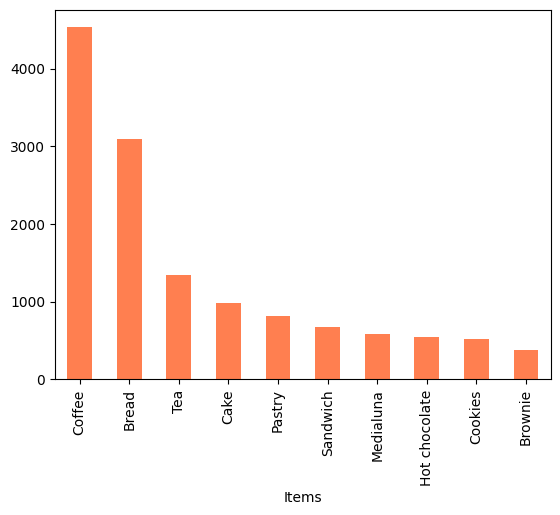

In [9]:
top_items = data['Items'].value_counts().head(10)
top_items.plot(kind='bar', color='coral')

Berikut adalah hasil data dari 10 produk yang paling sering dibeli:

1. Kopi - lebih dari 4000 pembelian

2. Roti - sekitar 3000 pembelian

3. Teh - sekitar 1500 pembelian

4. Kue - jumlah pembelian yang relatif tinggi

5. Pastri - jumlah pembelian yang cukup tinggi

6. Sandwich - jumlah pembelian yang sedikit lebih rendah

7. Medialuna - jumlah pembelian yang lebih rendah

8. Hot Chocolate - jumlah pembelian yang lebih rendah

9. Kek - jumlah pembelian yang lebih rendah

10. Brownie - jumlah pembelian yang paling rendah

3. Heatmap Korelasi: Untuk menunjukkan hubungan antara variabel numerik.

<Axes: >

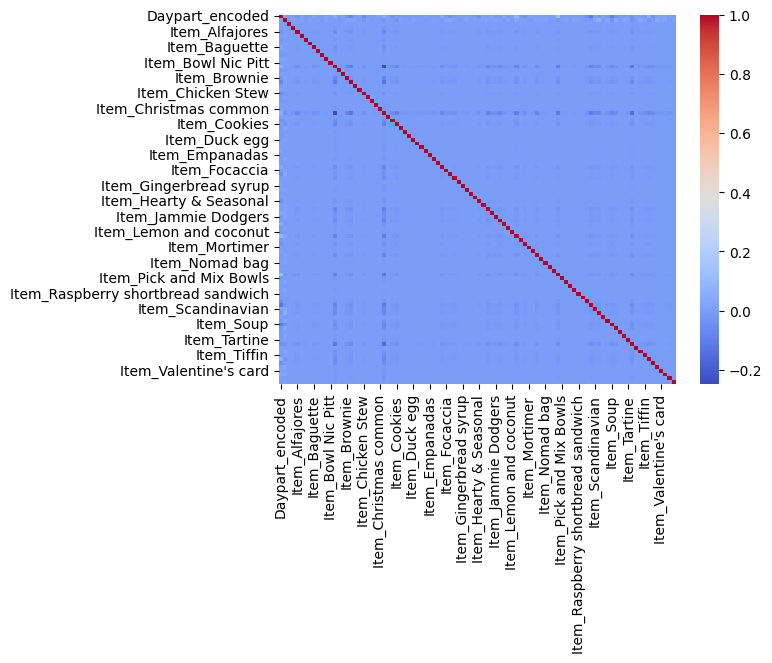

In [10]:
import seaborn as sns
sns.heatmap(data[['Daypart_encoded', 'DayType_encoded'] + list(items_encoded.columns)].corr(), cmap='coolwarm')

Heatmap ini menunjukkan korelasi antara berbagai barang. Barang-barang yang tercantum di sumbu-x dan sumbu-y mencakup "Daypart_encoded," "Item_Alfajores," "Item_Baguette," "Item_Bowl Nic Pitt," "Item_Brownie," "Item_Chicken Stew," "Item_Christmas common," "Item_Cookies," "Item_Duck egg," "Item_Empanadas," "Item_Focaccia," "Item_Gingerbread syrup," "Item_Hearty & Seasonal," "Item_Jammie Dodgers," "Item_Lemon and coconut," "Item_Mortimer," "Item_Nomad bag," "Item_Pick and Mix Bowls," "Item_Raspberry shortbread sandwich," "Item_Scandinavian," "Item_Soup," "Item_Tartine," "Item_Tiffin," dan "Item_Valentine's card."

Heatmap menggunakan gradasi warna dari biru ke merah untuk mewakili nilai korelasi, dengan biru menunjukkan korelasi negatif, merah menunjukkan korelasi positif, dan putih menunjukkan tidak ada korelasi. Garis diagonal dari kiri atas ke kanan bawah berwarna merah, menunjukkan korelasi positif sempurna 1,0 untuk setiap barang dengan dirinya sendiri. Pita warna di sebelah kanan heatmap memberikan skala untuk menafsirkan nilai korelasi, yang berkisar dari -0,2 hingga 1,0.

# **Clustering Preparation**

Menstandarisasi data untuk menghindari dominasi fitur dengan skala besar dalam clustering.

In [11]:
from sklearn.preprocessing import StandardScaler

features = data[['Daypart_encoded', 'DayType_encoded'] + list(items_encoded.columns)]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# **Dimensionality Reduction**

Mengurangi dimensi data menggunakan PCA menjadi 2 dimensi untuk visualisasi dan efisiensi.

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# **Clustering dengan K-Means**

1. Menggunakan elbow method untuk menentukan jumlah cluster optimal dengan melihat perubahan inersia.

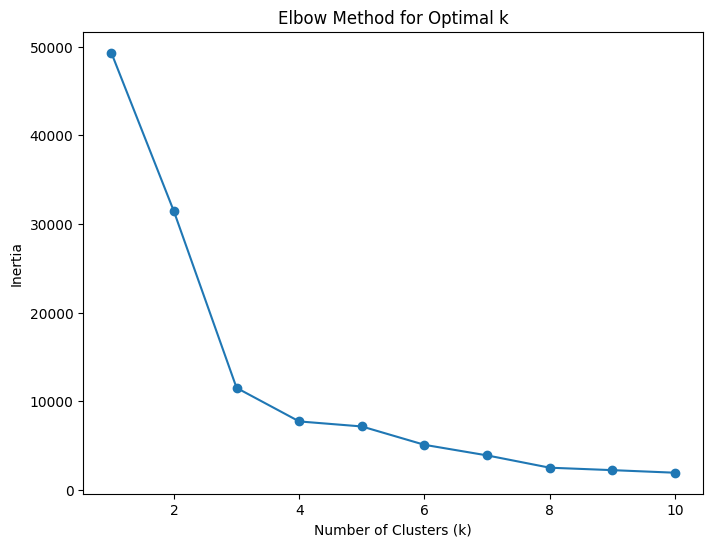

In [16]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

Garis ini dimulai dengan nilai inertia yang tinggi sekitar 50000 untuk k=1 dan menurun dengan cepat hingga k=3, setelah itu penurunan inertia menjadi lebih perlahan.

2. Melakukan clustering dengan jumlah cluster yang dipilih (k=4).

In [17]:
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(pca_features)


3. Memvisualisasikan hasil clustering dalam ruang 2 dimensi.

<Axes: >

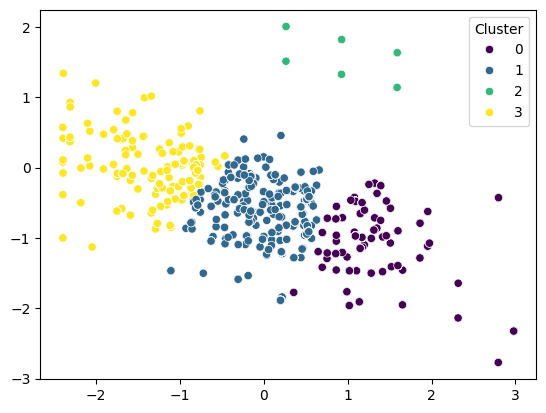

In [18]:
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=data['Cluster'], palette='viridis')

1. Cluster

Cluster 0 diwakili oleh warna ungu gelap.
Cluster 1 diwakili oleh warna biru kehijauan.
Cluster 2 diwakili oleh warna hijau toska.
Cluster 3 diwakili oleh warna kuning.

2. Keadaan Cluster

Cluster 0, 1, dan 3 tampak sebagai kelompok yang relatif padat.
Cluster 2 merupakan cluster yang paling tersebar.

In [23]:
!pip install openpyxl

data.to_excel('cleaned_bakery_data.xlsx', index=False, engine='openpyxl')